In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('bestsellers with categories.csv')

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.shape

(550, 7)

In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [ ]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

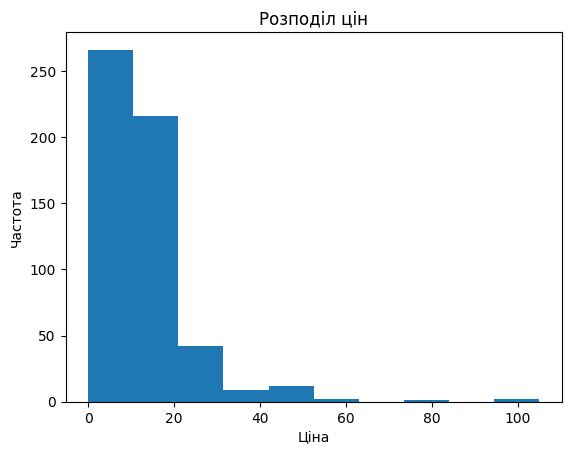

In [ ]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')
plt.show()

In [ ]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
price_list = pd.Series(
    data=[max_price, min_price, mean_price, median_price],
    index=['max_price', 'min_price', 'mean_price', 'median_price']
    )
price_list

max_price       105.0
min_price         0.0
mean_price       13.1
median_price     11.0
dtype: float64

In [ ]:
df['user_rating'].max()

4.9

In [ ]:
df[df['user_rating']==4.9].count()

name           52
author         52
user_rating    52
reviews        52
price          52
year           52
genre          52
dtype: int64

In [ ]:
max_reviews = df['reviews'].max()
df[df['reviews']==max_reviews]['name']

534    Where the Crawdads Sing
Name: name, dtype: object

In [ ]:
new_df = df[df['year']==2015]
new_df.groupby('user_rating').max()
result_2015 = new_df[new_df['price']==new_df['price'].max()]['name']
print(result_2015)

277    Publication Manual of the American Psychologic...
Name: name, dtype: object


In [ ]:
len(df[(df['genre'] == 'Fiction') & (df['year'] == 2010)])

20

In [ ]:
len(df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))])

1

In [ ]:
len(df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))])

1

In [ ]:
df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [6]:
df.groupby('genre')['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [19]:
count_df = df.groupby('author')['name'].agg('count').reset_index()
count_df.columns = ['author', 'number_of_books']
count_df

,author,number_of_books
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [12]:
count_df.max()

author             Zhi Gang Sha
number_of_books              12
dtype: object

In [20]:
rating_df = df.groupby('author')['user_rating'].agg('mean').reset_index()
rating_df

,author,user_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [14]:
rating_df.min()

author         Abraham Verghese
user_rating                 3.9
dtype: object

In [31]:
concat_df = pd.concat([count_df, rating_df], axis=1)
concat_df.columns = ['author', 'number_of_books', 'author2', 'average_rating']
concat_df = concat_df.drop('author2', axis=1)
concat_df

,author,number_of_books,average_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [33]:
concat_df.sort_values(['number_of_books', 'average_rating']).reset_index()

,index,author,number_of_books,average_rating
0,171,Muriel Barbery,1,4.000000
1,43,Chris Cleave,1,4.100000
2,109,Ian K. Smith M.D.,1,4.100000
3,186,Pierre Dukan,1,4.100000
4,81,Elizabeth Strout,1,4.200000
...,...,...,...,...
243,11,American Psychological Association,10,4.500000
244,226,Suzanne Collins,11,4.663636
245,92,Gary Chapman,11,4.736364
246,197,Rick Riordan,11,4.772727


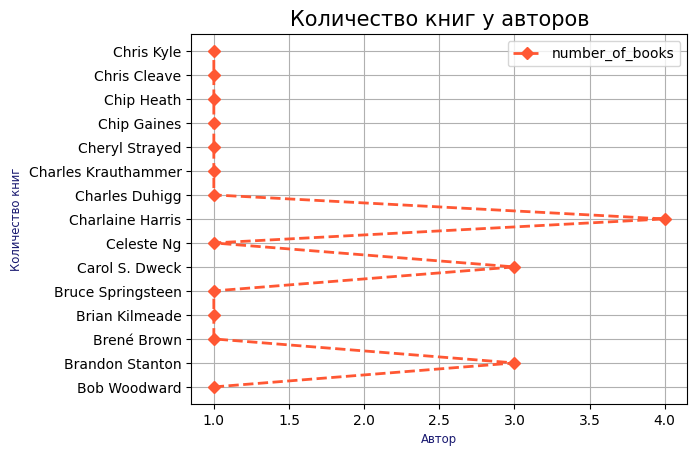

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

count_df2 = count_df[30:45]
plt.plot(
    count_df2['number_of_books'],
    count_df2['author'],
    label="number_of_books",
    linestyle="--",
    color="#FF5733",
    linewidth=2,
    marker="D",
)

plt.xlabel("Автор", fontsize="small", color="midnightblue")
plt.ylabel("Количество книг", fontsize="small", color="midnightblue")
plt.title("Количество книг у авторов", fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [42]:
!pip install seaborn

<Axes: xlabel='number_of_books', ylabel='author'>

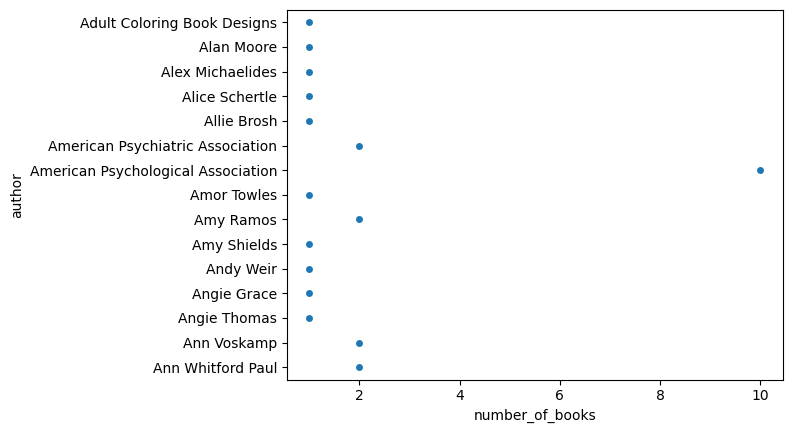

In [57]:
import seaborn as sns

count_df3 = count_df[5:20]
sns.swarmplot(x='number_of_books', y='author', data=count_df3)

<Axes: xlabel='number_of_books', ylabel='count'>

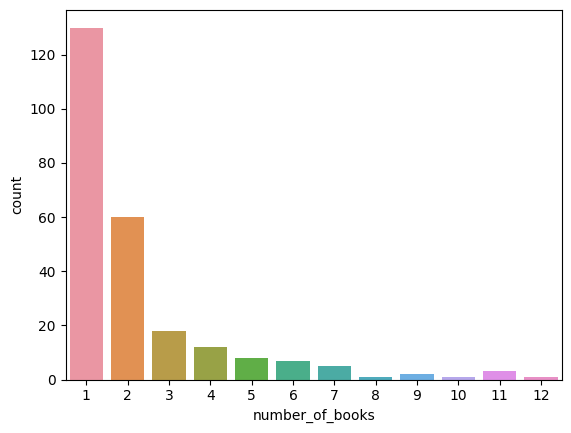

In [53]:
sns.countplot(x="number_of_books", data=count_df)

<Axes: xlabel='user_rating', ylabel='author'>

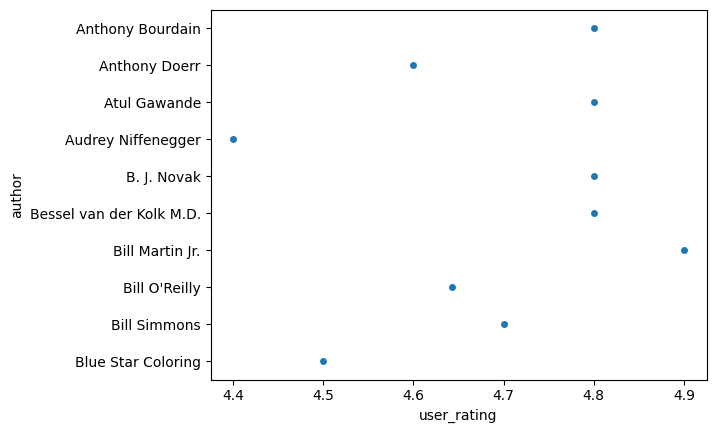

In [52]:
rat2 = rating_df[20:30]
sns.swarmplot(x='user_rating', y='author', data=rat2)

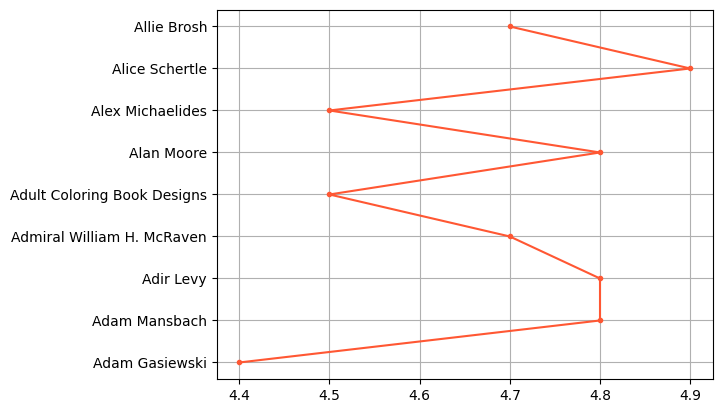

In [48]:
rat1 = rating_df[1:10]
q1 = rat1['author']
q2 = rat1['user_rating']
plt.plot(q2, q1, marker=".", color="#FF5733")
plt.grid()
plt.show()